# Fraud Detection 
#### Author: Vivek Nambidi

#### Import All the Necessary Libraries

In [126]:
import pandas as pd 
import numpy as np
import seaborn as sns
import math
import category_encoders as ce
import matplotlib.pyplot as plt
import itertools, operator
from scipy.stats import skew, kurtosis
import sklearn.metrics as metrics
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

%matplotlib inline

In [127]:
# Load the dataset A 
datasetA = pd.read_csv("Set-A.X.csv")
# Load target labels for dataset A
targetLabelsA = pd.read_csv("Set-A.y.csv",header=None)

# Load the dataset B
datasetB = pd.read_csv("Set-B.X.csv")
# Load the target labels for dataset B
targetLabelsB = pd.read_csv("Set-B.y.csv", header = None)

## Dataset A:

In [128]:
# Print first 2 Transcation of dataset A
print("First 2 transaction of dataset A:\n\n",(datasetA.head(2)))

First 2 transaction of dataset A:

    amount  hour1 state1  zip1  field1  domain1  field2  hour2  flag1  total  \
0   12.95      0     CA   925       3  AOL.COM       1      0      1  12.95   
1   11.01      0     CA   925       3  AOL.COM       1      0      1  11.01   

   field3  field4  field5  indicator1  indicator2  flag2  flag3  flag4  flag5  
0   -4276       7       0           1           0      1      1      0      1  
1   -4276       7       0           1           0      1      1      0      1  


In [129]:
# Summary of Information of dataset A
print("Summary of information of Dataset A: \n")
datasetA.info()

Summary of information of Dataset A: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 19 columns):
amount        94682 non-null float64
hour1         94682 non-null int64
state1        94682 non-null object
zip1          94682 non-null int64
field1        94682 non-null int64
domain1       94681 non-null object
field2        94682 non-null int64
hour2         94682 non-null int64
flag1         94682 non-null int64
total         94682 non-null float64
field3        94682 non-null int64
field4        94682 non-null int64
field5        94682 non-null int64
indicator1    94682 non-null int64
indicator2    94682 non-null int64
flag2         94682 non-null int64
flag3         94682 non-null int64
flag4         94682 non-null int64
flag5         94682 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 13.7+ MB


In [130]:
print("Target Labels of dataset A:\n\n", targetLabelsA.head())

Target Labels of dataset A:

    0
0  0
1  0
2  0
3  0
4  0


In [131]:
print("[INFO] Target Labels of dataset A:\n")
targetLabelsA.info()

[INFO] Target Labels of dataset A:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 1 columns):
0    94682 non-null int64
dtypes: int64(1)
memory usage: 739.8 KB


In [132]:
# Compute mean, meadian, percentile of target label of dataset A: 
print(targetLabelsA.describe())

                  0
count  94682.000000
mean       0.022116
std        0.147062
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [133]:
# Compute total number of fraudulent transaction
print("Total number of fraudulent transactions:\n\n",targetLabelsA.sum())

Total number of fraudulent transactions:

 0    2094
dtype: int64


/home/paperspace/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


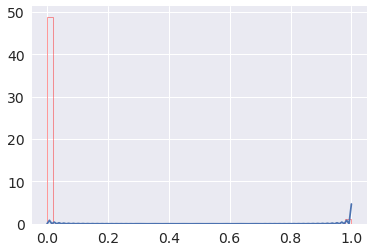

In [134]:
# Plotting histogram for the target labels of dataset A
sns.distplot(targetLabelsA,hist_kws={"histtype": "step", "linewidth": 1, "color": "r"})

In [135]:
print("Skewness:",skew(targetLabelsA.dropna()))
print("Kurtosis:", kurtosis(targetLabelsA.dropna()))

Skewness: [6.4991131]
Kurtosis: [40.23847115]


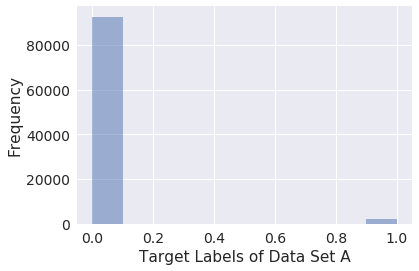

In [136]:
targetLabelsA.plot.hist(alpha = 0.5,legend = None,grid = True)
plt.xlabel("Target Labels of Data Set A")
plt.show()

In [137]:
# Filter and copy the categorical features into a new dataframe
copy_datasetA =  datasetA.select_dtypes(include =['object']).copy()

In [138]:
print("first 3 rows of the dataframe of categorical variable:\n\n",copy_datasetA.head(3))

first 3 rows of the dataframe of categorical variable:

   state1      domain1
0     CA      AOL.COM
1     CA      AOL.COM
2     CA  HOTMAIL.COM


In [139]:
# Check for null values in the dataset
print("Total number of missing values in the DataFrame is :\n")
print(copy_datasetA.isnull().values.sum())

Total number of missing values in the DataFrame is :

1


In [140]:
# Count of null values column wise:
print("Total number of null values columnwise:\n")
print(copy_datasetA.isnull().sum())

Total number of null values columnwise:

state1     0
domain1    1
dtype: int64


In [141]:
# Imputation applied to null values
copy_datasetA = copy_datasetA.fillna(copy_datasetA['domain1'].value_counts().index[0])

In [142]:
# Checking the number of null values after imputation
print("Number of null values after imputation:\n")
print(copy_datasetA.isnull().values.sum())

Number of null values after imputation:

0


In [143]:
print("Frequency Distribution of categories in State1: \n\n")
print(copy_datasetA['state1'].value_counts())

Frequency Distribution of categories in State1: 


CA    18676
FL     8436
TX     6620
NY     5795
GA     4479
VA     3703
IL     3604
AZ     3236
MD     2671
NJ     2660
PA     2508
NC     2387
OH     2279
WA     2202
MI     1728
CO     1662
MA     1604
NV     1505
TN     1386
MN     1278
MO     1170
LA     1164
SC     1150
CT     1111
IN     1075
OR     1001
AL      947
WI      728
OK      726
UT      635
KY      587
AR      568
KS      562
DC      543
AK      407
MS      405
IA      382
HI      369
ID      340
NH      312
NE      310
NM      309
DE      295
WV      235
RI      223
ME      211
MT      135
VT      106
SD       93
ND       85
WY       75
AP        3
AE        1
Name: state1, dtype: int64


In [144]:
print("Frequency Distribution of categories in domain1: \n\n")
print(copy_datasetA['domain1'].value_counts())

Frequency Distribution of categories in domain1: 


AOL.COM                   16452
YAHOO.COM                 15814
HOTMAIL.COM               11544
MSN.COM                    4029
COMCAST.NET                3918
SBCGLOBAL.NET              2498
COX.NET                    2164
EARTHLINK.NET              2089
BELLSOUTH.NET              1699
VERIZON.NET                1025
CHARTER.NET                 794
GMAIL.COM                   782
ADELPHIA.NET                650
CS.COM                      505
MINDSPRING.COM              477
JUNO.COM                    468
OPTONLINE.NET               445
ATT.NET                     385
CFL.RR.COM                  357
MAC.COM                     348
PACBELL.NET                 286
EXCITE.COM                  282
NETSCAPE.NET                259
NETZERO.NET                 229
US.ARMY.MIL                 228
NETZERO.COM                 228
PRODIGY.NET                 205
TAMPABAY.RR.COM             205
CHOICEDATA.COM              180
PEOPLEPC.COM        

In [145]:
print("No: of distinct categories in state1: \n")
print(copy_datasetA['state1'].value_counts().count())

print("\nNo of distinct categories in domain1\n")
print(copy_datasetA['domain1'].value_counts().count())

No: of distinct categories in state1: 

53

No of distinct categories in domain1

9809


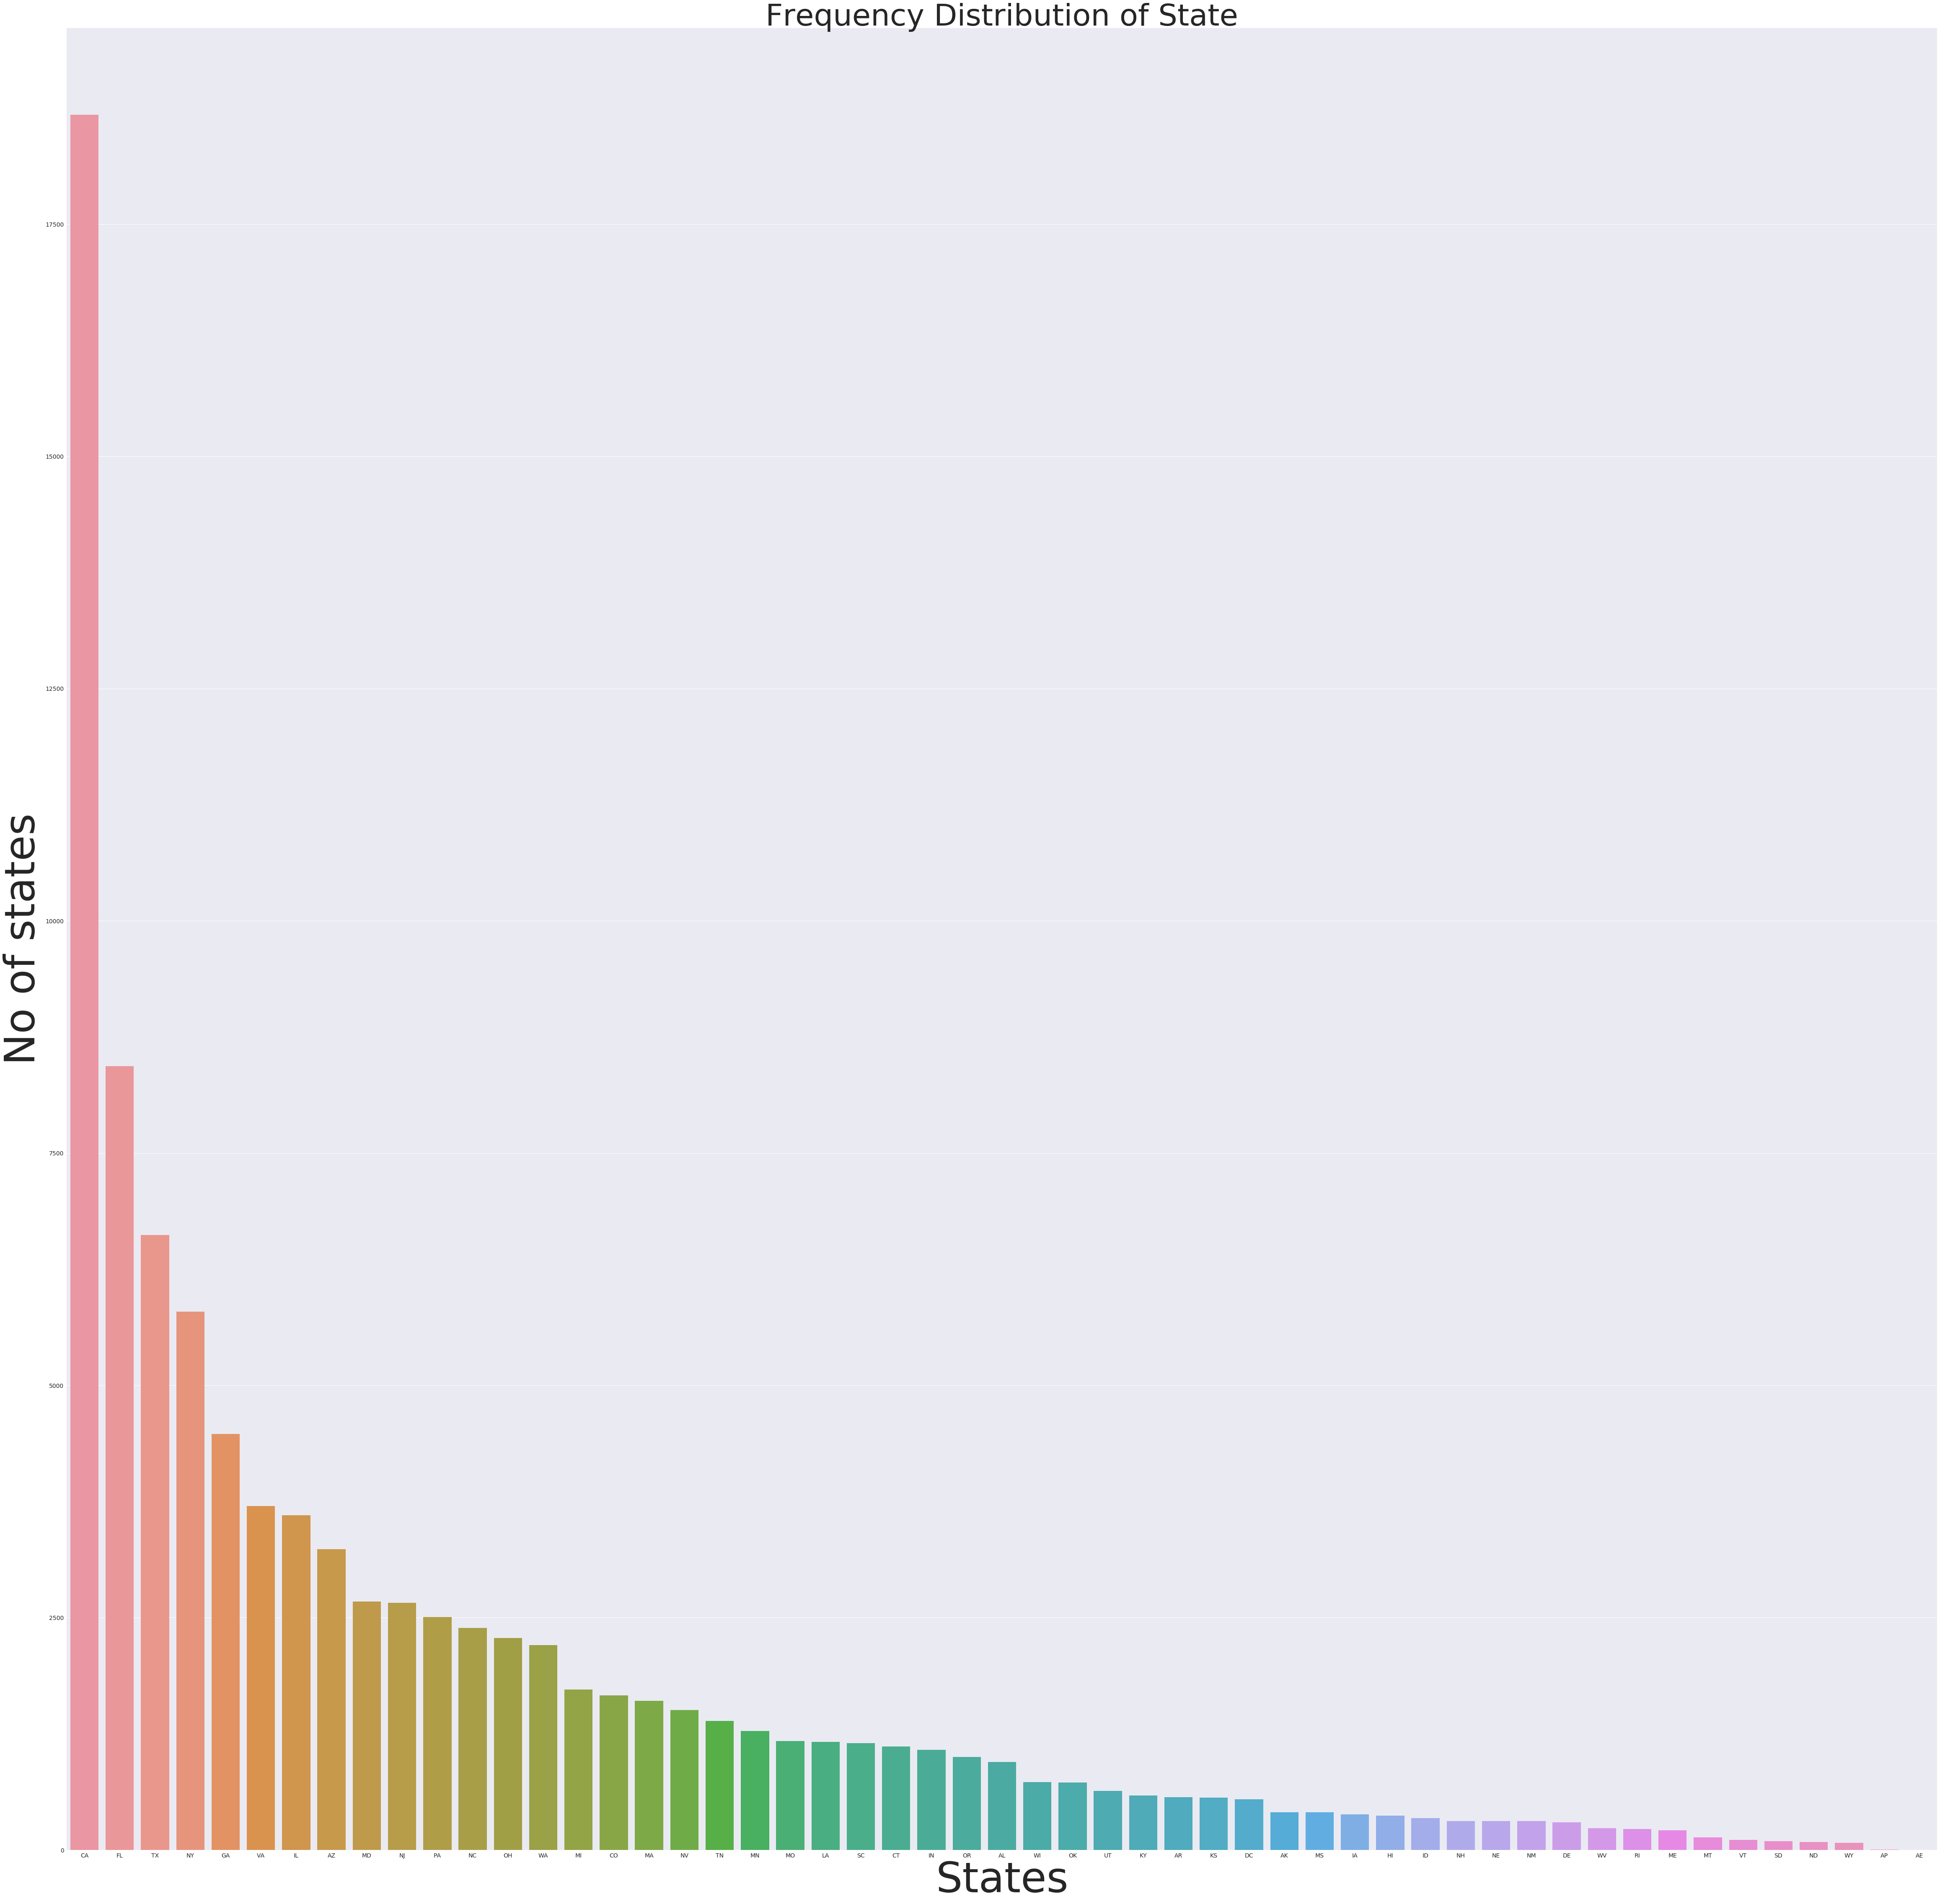

In [146]:
fig, ax = plt.subplots(figsize = (80,80))
state_count = copy_datasetA['state1'].value_counts()
sns.set(font_scale = 6)
sns.barplot(state_count.index,state_count.values, ax = ax)
plt.title("Frequency Distribution of State")
plt.ylabel('No of states', fontsize = 100)
plt.xlabel('States', fontsize = 100)
plt.show()

In [147]:
# Binary Encoding of categorical variables, similar to onehot, but stores categories as binary bitstrings.
copy_datasetA_2 = copy_datasetA.copy()
encoder = ce.BinaryEncoder(cols=['state1','domain1'])
categA_binary = encoder.fit_transform(copy_datasetA_2)
categA_binary.head(3)

,state1_0,state1_1,state1_2,state1_3,state1_4,state1_5,state1_6,domain1_0,domain1_1,domain1_2,...,domain1_5,domain1_6,domain1_7,domain1_8,domain1_9,domain1_10,domain1_11,domain1_12,domain1_13,domain1_14
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
categA_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 22 columns):
state1_0      94682 non-null int64
state1_1      94682 non-null int64
state1_2      94682 non-null int64
state1_3      94682 non-null int64
state1_4      94682 non-null int64
state1_5      94682 non-null int64
state1_6      94682 non-null int64
domain1_0     94682 non-null int64
domain1_1     94682 non-null int64
domain1_2     94682 non-null int64
domain1_3     94682 non-null int64
domain1_4     94682 non-null int64
domain1_5     94682 non-null int64
domain1_6     94682 non-null int64
domain1_7     94682 non-null int64
domain1_8     94682 non-null int64
domain1_9     94682 non-null int64
domain1_10    94682 non-null int64
domain1_11    94682 non-null int64
domain1_12    94682 non-null int64
domain1_13    94682 non-null int64
domain1_14    94682 non-null int64
dtypes: int64(22)
memory usage: 15.9 MB


In [149]:
concat_datasetA_categA_binary = pd.concat([datasetA,categA_binary], axis = 1)
print("DataFrame [Dataset A] after Concatinating:\n\n", concat_datasetA_categA_binary.head(2))

DataFrame [Dataset A] after Concatinating:

    amount  hour1 state1  zip1  field1  domain1  field2  hour2  flag1  total  \
0   12.95      0     CA   925       3  AOL.COM       1      0      1  12.95   
1   11.01      0     CA   925       3  AOL.COM       1      0      1  11.01   

      ...      domain1_5  domain1_6  domain1_7  domain1_8  domain1_9  \
0     ...              0          0          0          0          0   
1     ...              0          0          0          0          0   

   domain1_10  domain1_11  domain1_12  domain1_13  domain1_14  
0           0           0           0           0           1  
1           0           0           0           0           1  

[2 rows x 41 columns]


In [150]:
# Drop the columns with categorical values
list = pd.DataFrame(datasetA.select_dtypes(include =['object'])).columns
print("The categorical columns to be dropped are: ", list)
new_datasetA = concat_datasetA_categA_binary.drop(list, axis = 1)

The categorical columns to be dropped are:  Index(['state1', 'domain1'], dtype='object')


In [151]:
print("Preprocessed dataset A after removing null values & categorical values : \n\n")
print("First three rows of new dataset A :\n\n",new_datasetA.head(3))
print("\nSummary of new dataset A\n\n")
print(new_datasetA.info())

Preprocessed dataset A after removing null values & categorical values : 


First three rows of new dataset A :

    amount  hour1  zip1  field1  field2  hour2  flag1  total  field3  field4  \
0   12.95      0   925       3       1      0      1  12.95   -4276       7   
1   11.01      0   925       3       1      0      1  11.01   -4276       7   
2   38.85      0   928       3       1      0      0  38.85    2602      21   

      ...      domain1_5  domain1_6  domain1_7  domain1_8  domain1_9  \
0     ...              0          0          0          0          0   
1     ...              0          0          0          0          0   
2     ...              0          0          0          0          0   

   domain1_10  domain1_11  domain1_12  domain1_13  domain1_14  
0           0           0           0           0           1  
1           0           0           0           0           1  
2           0           0           0           1           0  

[3 rows x 39 columns]



In [152]:
# Function to compute prediction:
def prediction (Weight, x) :
    X = np.ones((x.shape[0],x.shape[1] + 1))
    X[:,1:] = x
    return np.matmul(X,Weight)

# Function to calculate cost/loss:
def loss(Weight, x, Y):
    loss = np.average(np.square(Y - prediction(Weight, x))) / 2
    return loss

# Function to compute gradient of error:
def gradient (Weight, x, Y) :
    X = np.ones((x.shape[0], x.shape[1]+1))
    X[:,1:] = x
    # Predicted Value Yhat:
    Yhat = prediction(Weight,x)
    d_Weight = - np.average((Y - Yhat) * X, axis= 0)
    d_Weight = d_Weight.reshape((d_Weight.shape[0], 1))
    return d_Weight

# Function to perform mini batch gradient descent 
def mini_batch_grad_descent (Weight, x, Y, alpha, no_of_iter, batch_size, n) :
    cost = np.zeros(no_of_iter)
    for i in range(no_of_iter) :
        for j in range(0, x.shape[0], batch_size):
            # Gradient
            d_Weight = gradient (Weight, x[j:j+batch_size,:], Y[j:j+batch_size,:])
            # Update the weights
            Weight = Weight - alpha * d_Weight
        #Cost:
        cost[i] = loss(Weight, x, Y)
        if i % n == 0 :
            print ('For Iteration =',i,'Loss =',loss(Weight, x, Y)) 
    return Weight, cost

In [153]:
# Split dataset A and target labels of dataset A into train (80%) and test (20%)
#trainX, testX, trainY, testY = train_test_split(new_datasetA,targetLabelsA.values, test_size = 0.2, random_state = 50)

In [154]:
# 10- Fold Cross Validation  
kf = KFold(n_splits=10, random_state=None, shuffle= True)
kf.get_n_splits(new_datasetA)

10

In [155]:
for trainIndex, testIndex in kf.split(new_datasetA):
    print("Train:", trainIndex, "Test:",testIndex)
    trainX, testX = new_datasetA.values[trainIndex], new_datasetA.values[testIndex] 
    trainY, testY = targetLabelsA.values[trainIndex], targetLabelsA.values[testIndex]

Train: [    0     1     2 ... 94678 94680 94681] Test: [    5     7    11 ... 94658 94670 94679]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    3    12    23 ... 94662 94663 94676]
Train: [    1     2     3 ... 94679 94680 94681] Test: [    0    20    22 ... 94622 94649 94673]
Train: [    0     2     3 ... 94679 94680 94681] Test: [    1    10    13 ... 94640 94641 94654]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    8    14    25 ... 94655 94672 94675]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    6    35    40 ... 94666 94668 94678]
Train: [    0     1     2 ... 94678 94679 94681] Test: [   19    26    34 ... 94665 94677 94680]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    4    24    27 ... 94660 94667 94674]
Train: [    0     1     2 ... 94678 94679 94680] Test: [   15    17    30 ... 94648 94659 94681]
Train: [    0     1     3 ... 94679 94680 94681] Test: [    2     9    16 ... 94656 94669 94671]


In [156]:
print("Information regarding training and testing data set:\n")
print("Shape of Input Train Data:",trainX.shape)
print("Shape of Input Test Data:",testX.shape)
print("Shape of Target Train Data:",trainY.shape)
print("Shape of Target Test Data:",testY.shape)

Information regarding training and testing data set:

Shape of Input Train Data: (85214, 39)
Shape of Input Test Data: (9468, 39)
Shape of Target Train Data: (85214, 1)
Shape of Target Test Data: (9468, 1)


In [157]:
# Scale the data using Min Max Scaler:
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_TrainX = MinMax_Scaler.fit_transform(trainX)
scaled_TestX = MinMax_Scaler.transform(testX)

In [158]:
print("Shape of Scaled/Normalized Train Data:",scaled_TrainX.shape)
print("Shape of Scaled/Normalized Test Data:",scaled_TestX.shape)

Shape of Scaled/Normalized Train Data: (85214, 39)
Shape of Scaled/Normalized Test Data: (9468, 39)


In [159]:
print("Normalized train data:\n\n",scaled_TrainX)
print("\nNormalized test data: \n\n",scaled_TestX)

Normalized train data:

 [[0.13574423 0.         0.92577733 ... 0.         0.         1.        ]
 [0.11540881 0.         0.92577733 ... 0.         0.         1.        ]
 [0.27148847 0.         0.07522568 ... 0.         0.         1.        ]
 ...
 [0.4072327  0.2173913  0.90672016 ... 0.         0.         1.        ]
 [0.4072327  0.26086957 0.10330993 ... 0.         0.         1.        ]
 [0.4072327  0.82608696 0.85757272 ... 0.         0.         1.        ]]

Normalized test data: 

 [[0.4072327  0.         0.92878636 ... 0.         1.         0.        ]
 [0.52358491 0.         0.91374122 ... 0.         0.         1.        ]
 [0.13574423 0.         0.95486459 ... 0.         0.         1.        ]
 ...
 [0.4072327  0.86956522 0.9217653  ... 1.         0.         1.        ]
 [0.13574423 1.         0.92678034 ... 0.         0.         1.        ]
 [0.4072327  0.30434783 0.72918756 ... 1.         1.         0.        ]]


In [160]:
# Define the hyper-parameters
Weights = np.zeros((new_datasetA.shape[1]+1, 1))
alpha_rate = 0.001
total_noof_iteration = 500
batch_Size = 64 

In [282]:
weight, cost = mini_batch_grad_descent (Weights, scaled_TrainX, trainY, alpha_rate, total_noof_iteration, batch_Size, 50)

For Iteration = 0 Loss = 0.012835619860213074
For Iteration = 50 Loss = 0.011825117150349044
For Iteration = 100 Loss = 0.011478103678674226
For Iteration = 150 Loss = 0.011272821662182641
For Iteration = 200 Loss = 0.011143101645312617
For Iteration = 250 Loss = 0.011057295115356261
For Iteration = 300 Loss = 0.010998722856350054
For Iteration = 350 Loss = 0.010957905495375257
For Iteration = 400 Loss = 0.010929086206335856
For Iteration = 450 Loss = 0.0109085732389593


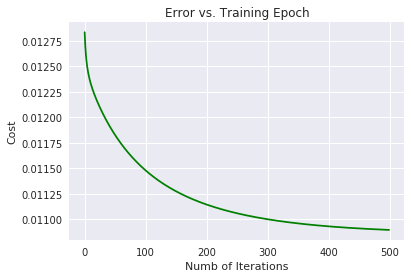

In [283]:
# Plot of cost/ Error VS Training Epoch: 
fig = plt.figure() 
sns.set()
plt.plot(np.arange(total_noof_iteration), cost, 'g')  
plt.xlabel('Numb of Iterations')  
plt.ylabel('Cost')
plt.grid(True)
plt.title('Error vs. Training Epoch')  
plt.show()

In [163]:
print("Bias =", weight[0])

Bias = [0.16644138]


In [164]:
print(" Coefficients: \n", weight[1:])

 Coefficients: 
 [[-9.40708917e-03]
 [-5.69784038e-02]
 [ 1.47383858e-02]
 [ 5.30954915e-02]
 [ 2.97837416e-03]
 [-3.51696880e-02]
 [-1.54275988e-02]
 [-9.80302489e-03]
 [-8.99246061e-02]
 [-6.65597089e-02]
 [ 1.12719972e-02]
 [ 1.09713126e-02]
 [ 3.79035650e-03]
 [-3.89332129e-03]
 [ 3.18433380e-02]
 [ 2.71309120e-02]
 [ 1.31700186e-01]
 [ 0.00000000e+00]
 [-4.85196068e-05]
 [-3.55663341e-03]
 [ 7.29876405e-03]
 [-3.09767335e-03]
 [ 1.32442174e-03]
 [ 2.47236483e-03]
 [ 0.00000000e+00]
 [ 4.96011413e-02]
 [ 5.31046428e-03]
 [-2.12499956e-03]
 [ 3.63213115e-03]
 [-2.99560284e-03]
 [ 4.09758959e-03]
 [-2.21609740e-03]
 [-6.70729203e-03]
 [ 5.22857878e-03]
 [ 1.17212882e-03]
 [ 1.72590846e-03]
 [-4.31038830e-03]
 [ 4.03538450e-03]
 [ 8.50765535e-03]]


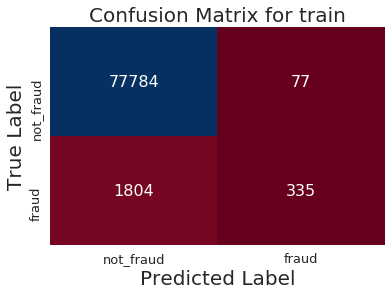

In [280]:
predicted_Y_train = prediction(weight,scaled_TrainX)

fig = plt.figure()
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(trainY, predicted_Y_train.round())
sns.set(font_scale = 1.3)
dframe = pd.DataFrame(cm, index=Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix for train",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [284]:
predicted_Y = prediction(weight,scaled_TestX)

In [166]:
mse = np.sum(np.square(testY - predicted_Y)/testY.shape[0])
print("Mean square error =", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error =", rmse)

Mean square error = 0.02405416830872528
Root Mean Square Error = 0.15509406277715881


In [167]:
confusion_matrix(testY, predicted_Y.round())

array([[9250,    0],
       [ 218,    0]])

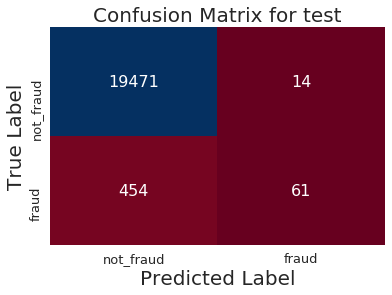

In [285]:
fig = plt.figure()
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testY, predicted_Y.round())
sns.set(font_scale = 1.3)
dframe = pd.DataFrame(cm, index=Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix for test",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [169]:
print("Classification Report:\n")
print(classification_report(testY, predicted_Y.round()))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9250
           1       0.00      0.00      0.00       218

   micro avg       0.98      0.98      0.98      9468
   macro avg       0.49      0.50      0.49      9468
weighted avg       0.95      0.98      0.97      9468



/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Area Under Curve Score = 0.8699595834366476


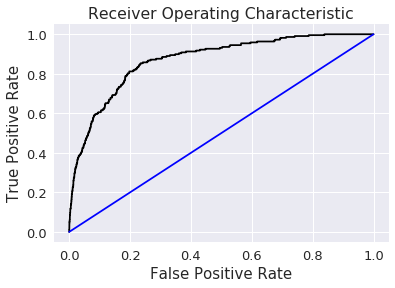

In [170]:
fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testY, predicted_Y)
roc_auc = metrics.auc(fpr, tpr)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

In [171]:
print("Accuracy Score:\n",accuracy_score(testY, predicted_Y.round()))

Accuracy Score:
 0.9769750739332488


In [172]:
rkf = RepeatedKFold(n_splits= 10, n_repeats= 10, random_state = 102)
for train_index, test_index in rkf.split(new_datasetA):
    print("Train:", train_index, "Test:",test_index)
    trainX, testX = new_datasetA.values[train_index], new_datasetA.values[test_index] 
    trainY, testY = targetLabelsA.values[train_index], targetLabelsA.values[test_index]

Train: [    0     1     2 ... 94679 94680 94681] Test: [   11    21    22 ... 94610 94631 94650]
Train: [    0     1     2 ... 94678 94680 94681] Test: [    6     9    17 ... 94667 94670 94679]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    3    15    19 ... 94658 94668 94675]
Train: [    0     1     2 ... 94679 94680 94681] Test: [   13    20    43 ... 94645 94646 94674]
Train: [    0     1     2 ... 94678 94679 94681] Test: [   16    27    35 ... 94643 94647 94680]
Train: [    1     2     3 ... 94679 94680 94681] Test: [    0     7    26 ... 94665 94669 94676]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    8    10    25 ... 94640 94653 94672]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    4    38    40 ... 94641 94666 94671]
Train: [    0     1     2 ... 94679 94680 94681] Test: [   14    18    24 ... 94663 94677 94678]
Train: [    0     3     4 ... 94678 94679 94680] Test: [    1     2     5 ... 94662 94673 94681]
Train: [    0     1     2 ... 

Train: [    0     1     2 ... 94678 94679 94681] Test: [    7    19    24 ... 94674 94677 94680]
Train: [    0     1     4 ... 94679 94680 94681] Test: [    2     3    16 ... 94667 94669 94675]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    4    12    29 ... 94659 94672 94676]
Train: [    0     1     2 ... 94679 94680 94681] Test: [   11    22    34 ... 94648 94662 94663]
Train: [    0     1     2 ... 94678 94680 94681] Test: [    4    10    30 ... 94663 94676 94679]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    7    24    28 ... 94658 94661 94673]
Train: [    0     1     2 ... 94679 94680 94681] Test: [   37    55    56 ... 94655 94664 94670]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    6    12    13 ... 94633 94640 94648]
Train: [    0     1     2 ... 94677 94679 94681] Test: [   26    50    51 ... 94674 94678 94680]
Train: [    0     1     2 ... 94678 94679 94680] Test: [   18    25    67 ... 94672 94675 94681]
Train: [    0     3     4 ... 

In [173]:
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_TrainX = MinMax_Scaler.fit_transform(trainX)
scaled_TestX = MinMax_Scaler.transform(testX)

In [286]:
weight, cost = mini_batch_grad_descent (Weights, scaled_TrainX, trainY, alpha_rate, total_noof_iteration, batch_Size, 100)

For Iteration = 0 Loss = 0.012835619860213074
For Iteration = 100 Loss = 0.011478103678674226
For Iteration = 200 Loss = 0.011143101645312617
For Iteration = 300 Loss = 0.010998722856350054
For Iteration = 400 Loss = 0.010929086206335856


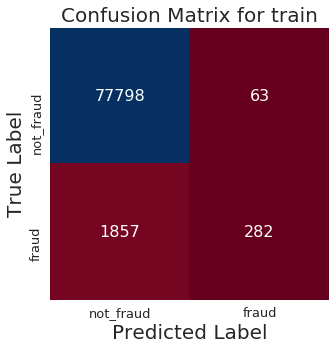

In [287]:
predicted_Y_tr = prediction(weight,scaled_TrainX)

fig = plt.subplots(figsize = (5,5)) 
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(trainY, predicted_Y_tr.round())
sns.set(font_scale = 1.4)
dframe = pd.DataFrame(cm, index= Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix for train",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [288]:
predicted_Y = prediction(weight,scaled_TestX)

In [289]:
mse = np.sum(np.square(testY - predicted_Y)/testY.shape[0])
print("Mean square error =", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error =", rmse)

Mean square error = 0.021538261121207308
Root Mean Square Error = 0.14675919433278212


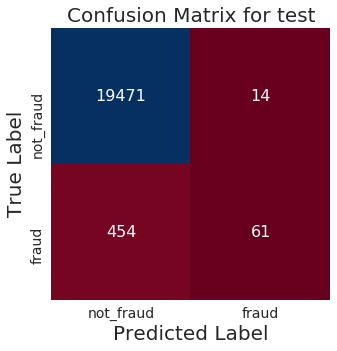

In [291]:
fig = plt.subplots(figsize = (5,5)) 
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testY, predicted_Y.round())
sns.set(font_scale = 1.4)
dframe = pd.DataFrame(cm, index= Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix for test",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [178]:
print("Classification Report:\n")
print(classification_report(testY, predicted_Y.round()))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9239
           1       0.00      0.00      0.00       229

   micro avg       0.98      0.98      0.98      9468
   macro avg       0.49      0.50      0.49      9468
weighted avg       0.95      0.98      0.96      9468



/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Area Under Curve Score = 0.85015391843292


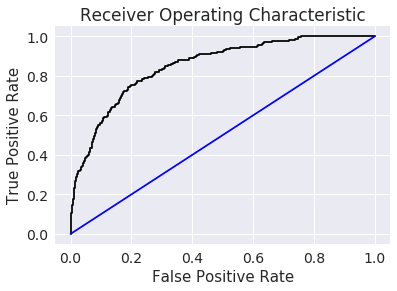

In [179]:
fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testY, predicted_Y)
roc_auc = metrics.auc(fpr, tpr)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

## Dataset B : Naive Bayes

In [180]:
# Print first 2 Transcation of dataset B
print("First 2 transaction of dataset B:\n\n",(datasetB.head(2)))

First 2 transaction of dataset B:

    amount  hour1 state1  zip1         custAttr1  field1  \
0   12.95      0     WA   986  1234567890123456       0   
1   38.85      0     WA   980  1234567890123457       3   

                    custAttr2  field2  hour2  flag1  total  field3  field4  \
0  luhxsodzmjhng7@comcast.net       0      0      0  12.95    -723      19   
1     pfixyiqfpvkcg@zjyxs.net       1      0      0  38.85    5497      14   

   indicator1  indicator2  flag2  flag3  flag4  flag5  
0           0           0      0      0      0      1  
1           1           0      0      1      0      1  


In [181]:
# Summary of Information of dataset B
print("Summary of information of Dataset B: \n")
datasetB.info()

Summary of information of Dataset B: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        99999 non-null object
zip1          100000 non-null int64
custAttr1     100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 14.5+ MB


In [182]:
print("Target Labels of dataset B:\n\n", targetLabelsB.head())

Target Labels of dataset B:

    0
0  0
1  0
2  0
3  0
4  0


In [183]:
# Compute mean, meadian, percentile of target label of dataset B: 
print(targetLabelsB.describe())

                   0
count  100000.000000
mean        0.026540
std         0.160735
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [184]:
# Compute total number of fraudulent transaction
print("Total number of fraudulent transactions:\n\n",targetLabelsB.sum())

Total number of fraudulent transactions:

 0    2654
dtype: int64


/home/paperspace/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


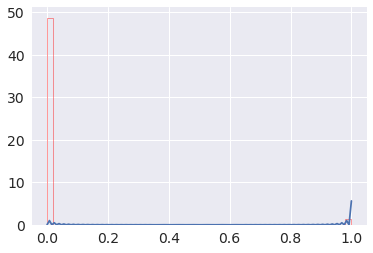

In [185]:
# Plotting histogram for the target labels of dataset B
sns.distplot(targetLabelsB,hist_kws={"histtype": "step", "linewidth": 1, "color": "r"})

In [186]:
print("Skewness:",skew(targetLabelsB.dropna()))
print("Kurtosis:", kurtosis(targetLabelsB.dropna()))

Skewness: [5.89120011]
Kurtosis: [32.70623871]


In [187]:
# Filter and copy the categorical features into a new dataframe
copy_datasetB =  datasetB.select_dtypes(include =['object']).copy()

In [188]:
print("first 3 rows of the dataframe of categorical variable:\n\n",copy_datasetB.head(3))

first 3 rows of the dataframe of categorical variable:

   state1                   custAttr2
0     WA  luhxsodzmjhng7@comcast.net
1     WA     pfixyiqfpvkcg@zjyxs.net
2     KY       shbjoldciswwm@aol.com


In [189]:
# Check for null values in the dataset
print("Total number of missing values in the DataFrame B is :\n")
print(copy_datasetB.isnull().values.sum())

Total number of missing values in the DataFrame B is :

1


In [190]:
# Count of null values column wise in dataset B:
print("Total number of null values columnwise in dataset B:\n")
print(copy_datasetB.isnull().sum())

Total number of null values columnwise in dataset B:

state1       1
custAttr2    0
dtype: int64


In [191]:
# Imputation applied to null values
copy_datasetB = copy_datasetB.fillna(copy_datasetB['state1'].value_counts().index[0])

In [192]:
# Checking the number of null values after imputation
print("Number of null values after imputation:\n")
print(copy_datasetB.isnull().values.sum())

Number of null values after imputation:

0


In [193]:
print("Frequency Distribution of categories in State1: \n\n")
print(copy_datasetB['state1'].value_counts())

Frequency Distribution of categories in State1: 


CA    19718
FL     8055
TX     6785
NY     6566
GA     4105
IL     3963
VA     3779
AZ     3216
NJ     2900
PA     2896
OH     2741
WA     2557
NC     2539
MD     2529
MI     2162
MA     1757
LA     1689
NV     1487
TN     1484
MN     1433
CO     1401
CT     1337
OR     1241
IN     1219
MO     1211
SC      989
WI      866
AL      851
KY      654
KS      621
UT      614
OK      606
AR      498
AK      486
HI      483
NM      477
DC      464
IA      459
MS      410
NH      397
NE      327
ID      291
WV      269
ME      266
DE      253
RI      252
MT      187
SD      167
WY      109
VT      106
ND      105
AP       19
AE        3
PR        1
Name: state1, dtype: int64


In [194]:
print("Frequency Distribution of categories in custAttr2: \n\n")
print(copy_datasetB['custAttr2'].value_counts())

Frequency Distribution of categories in custAttr2: 


zwzihwgzxohnq@cbbtr.com             262
antihyknzxmva@choicedata.com        247
pugrmyvovmvyp@cbbtr.com             172
ixhkuerllitft@clintmiller.com        92
zsxbringavcae@cbbtr.com              82
nwufbdovzievu@aol.com                75
iyjaybrnmdlao@comcast.net            73
oqrlcjgbdsvlu2@hotmail.com           58
qcosrkuucvhwq@cbbtr.com              49
ddudfpzitznuw216@earthlink.net       48
kwvgwyeuuvjuk@msn.com                48
crtxdwiruubzk@adelphia.net           43
rqesnoyhixdns10051@yahoo.com         42
ynozmyepftucq@wellsfargo.com         39
uxwmulsoaqxlj588@aol.com             38
kjfnanpwmquwt@yahoo.com              38
hulzbaeqrgdoe@kodeihhomes.com        37
uwhlbwqeqpqtb@aol.com                35
iwbsljgwkrauk@msn.com                35
bcfflnjlyzgjk@netzero.com            32
uymurxfbdqqkn3725@aol.com            32
gsntwhlhcxtki1273@aol.com            32
hvaomlcrtkgws@credit.org             29
riekmpnfmopus@bellsouth.ne

In [195]:
print("No: of distinct categories in state1: \n")
print(copy_datasetB['state1'].value_counts().count())

print("\nNo of distinct categories in custAttr2\n")
print(copy_datasetB['custAttr2'].value_counts().count())

No: of distinct categories in state1: 

54

No of distinct categories in custAttr2

70124


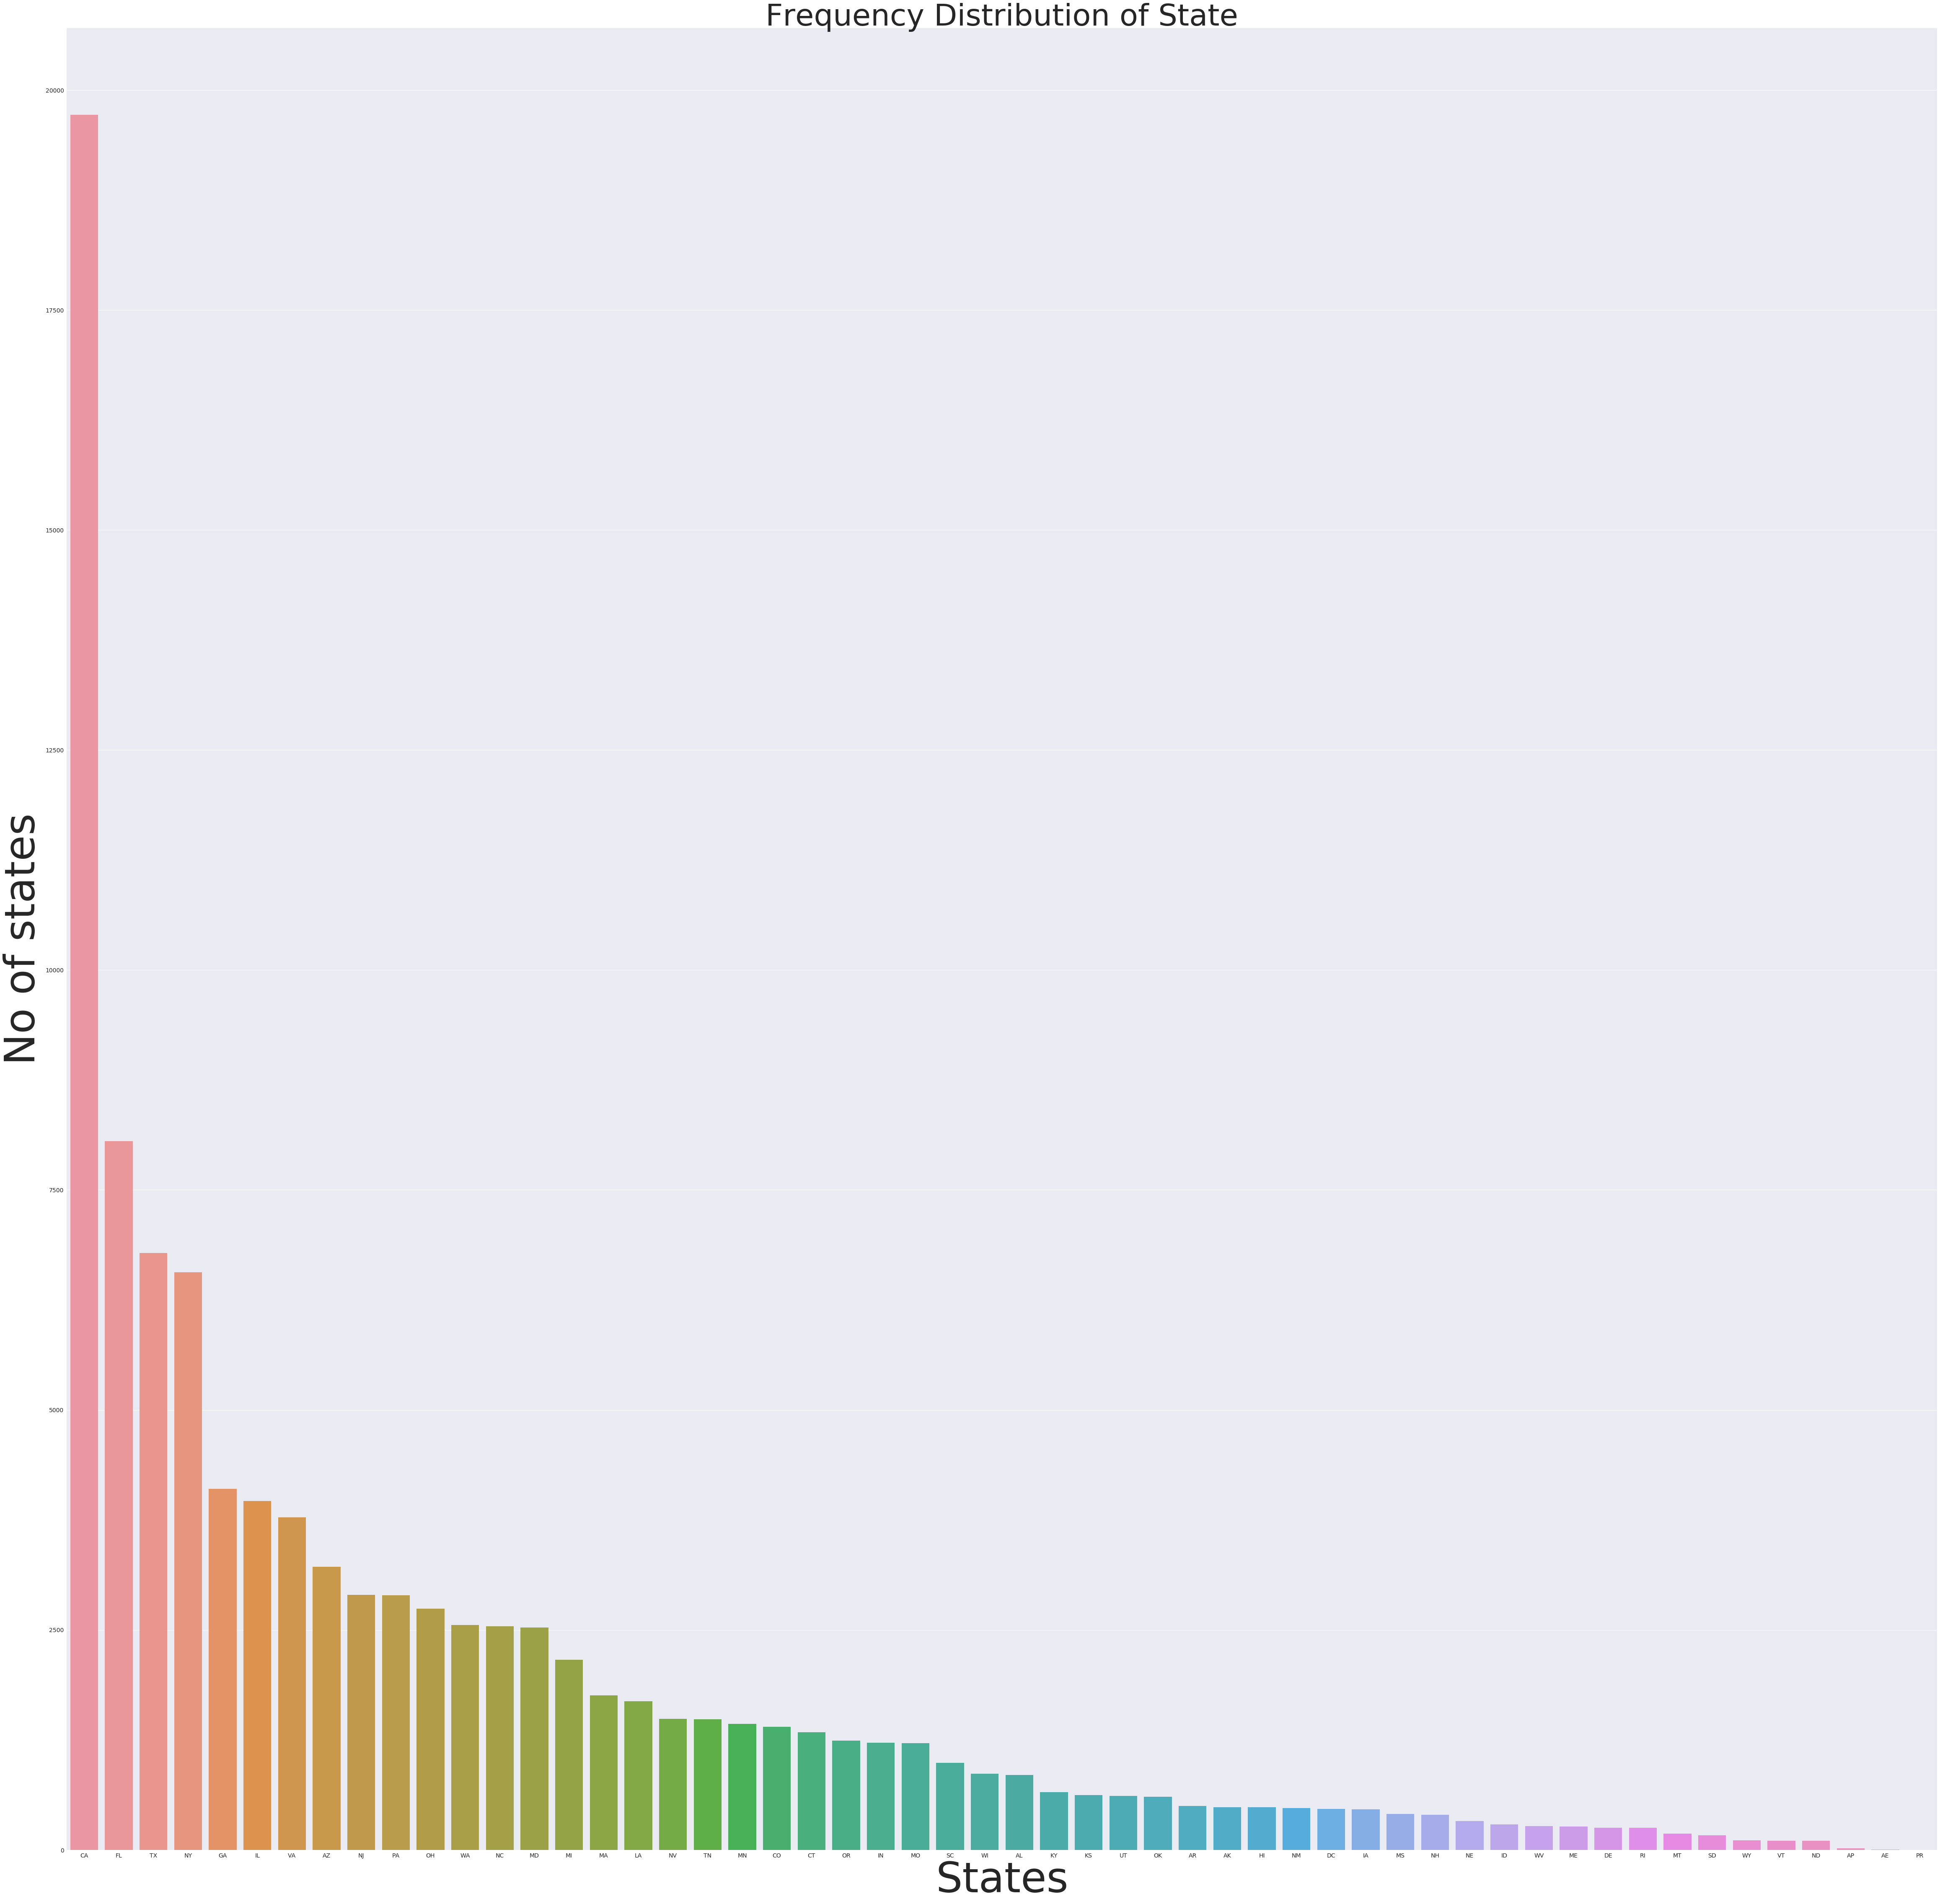

In [196]:
fig, ax = plt.subplots(figsize = (80,80))
state_count = copy_datasetB['state1'].value_counts()
sns.set(font_scale = 6)
sns.barplot(state_count.index,state_count.values, ax = ax)
plt.title("Frequency Distribution of State")
plt.ylabel('No of states', fontsize = 100)
plt.xlabel('States', fontsize = 100)
plt.show()

In [197]:
# Binary Encoding of categorical variables, similar to onehot, but stores categories as binary bitstrings.
copy_datasetB_2 = copy_datasetB.copy()
encoder = ce.BinaryEncoder(cols=['state1','custAttr2'])
categB_binary = encoder.fit_transform(copy_datasetB_2)
categB_binary.head(3)

,state1_0,state1_1,state1_2,state1_3,state1_4,state1_5,state1_6,custAttr2_0,custAttr2_1,custAttr2_2,...,custAttr2_8,custAttr2_9,custAttr2_10,custAttr2_11,custAttr2_12,custAttr2_13,custAttr2_14,custAttr2_15,custAttr2_16,custAttr2_17
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [198]:
categB_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
state1_0        100000 non-null int64
state1_1        100000 non-null int64
state1_2        100000 non-null int64
state1_3        100000 non-null int64
state1_4        100000 non-null int64
state1_5        100000 non-null int64
state1_6        100000 non-null int64
custAttr2_0     100000 non-null int64
custAttr2_1     100000 non-null int64
custAttr2_2     100000 non-null int64
custAttr2_3     100000 non-null int64
custAttr2_4     100000 non-null int64
custAttr2_5     100000 non-null int64
custAttr2_6     100000 non-null int64
custAttr2_7     100000 non-null int64
custAttr2_8     100000 non-null int64
custAttr2_9     100000 non-null int64
custAttr2_10    100000 non-null int64
custAttr2_11    100000 non-null int64
custAttr2_12    100000 non-null int64
custAttr2_13    100000 non-null int64
custAttr2_14    100000 non-null int64
custAttr2_15    100000 non-null int64
custAttr2_16    

In [199]:
concat_datasetB_categB_binary = pd.concat([datasetB,categB_binary], axis = 1)
print("DataFrame [Dataset B] after Concatinating:\n\n", concat_datasetB_categB_binary.head(2))

DataFrame [Dataset B] after Concatinating:

    amount  hour1 state1  zip1         custAttr1  field1  \
0   12.95      0     WA   986  1234567890123456       0   
1   38.85      0     WA   980  1234567890123457       3   

                    custAttr2  field2  hour2  flag1      ...       \
0  luhxsodzmjhng7@comcast.net       0      0      0      ...        
1     pfixyiqfpvkcg@zjyxs.net       1      0      0      ...        

   custAttr2_8  custAttr2_9  custAttr2_10  custAttr2_11  custAttr2_12  \
0            0            0             0             0             0   
1            0            0             0             0             0   

   custAttr2_13  custAttr2_14  custAttr2_15  custAttr2_16  custAttr2_17  
0             0             0             0             0             1  
1             0             0             0             1             0  

[2 rows x 44 columns]


In [200]:
# Drop the columns with categorical values
list = pd.DataFrame(datasetB.select_dtypes(include =['object'])).columns
print("The categorical columns to be dropped are: ", list)
new_datasetB = concat_datasetB_categB_binary.drop(list, axis = 1)

The categorical columns to be dropped are:  Index(['state1', 'custAttr2'], dtype='object')


In [201]:
print("Preprocessed dataset B after removing null values & categorical values : \n\n")
print("First three rows of new dataset B :\n\n",new_datasetB.head(3))
print("\nSummary of new dataset B\n\n")
print(new_datasetB.info())

Preprocessed dataset B after removing null values & categorical values : 


First three rows of new dataset B :

    amount  hour1  zip1         custAttr1  field1  field2  hour2  flag1  total  \
0   12.95      0   986  1234567890123456       0       0      0      0  12.95   
1   38.85      0   980  1234567890123457       3       1      0      0  38.85   
2   38.85      0   402  1234567890123458       2       1      0      0  38.85   

   field3      ...       custAttr2_8  custAttr2_9  custAttr2_10  custAttr2_11  \
0    -723      ...                 0            0             0             0   
1    5497      ...                 0            0             0             0   
2   -4420      ...                 0            0             0             0   

   custAttr2_12  custAttr2_13  custAttr2_14  custAttr2_15  custAttr2_16  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2          

In [202]:
rkf = RepeatedKFold(n_splits= 10, n_repeats= 10, random_state = 10)
for train_index, test_index in rkf.split(new_datasetB):
    print("Train:", train_index, "Test:",test_index)
    trainX, testX = new_datasetB.values[train_index], new_datasetB.values[test_index] 
    trainY, testY = targetLabelsB.values[train_index], targetLabelsB.values[test_index]

Train: [    0     1     2 ... 99997 99998 99999] Test: [   28    39    41 ... 99977 99984 99992]
Train: [    0     1     2 ... 99997 99998 99999] Test: [    5    30    31 ... 99944 99963 99985]
Train: [    0     1     2 ... 99997 99998 99999] Test: [    7     8    14 ... 99982 99986 99989]
Train: [    1     2     3 ... 99996 99997 99998] Test: [    0     9    13 ... 99978 99994 99999]
Train: [    0     1     2 ... 99996 99998 99999] Test: [    6    11    17 ... 99962 99968 99997]
Train: [    0     2     5 ... 99997 99998 99999] Test: [    1     3     4 ... 99988 99993 99995]
Train: [    0     1     2 ... 99996 99997 99999] Test: [   47    60    62 ... 99983 99991 99998]
Train: [    0     1     2 ... 99997 99998 99999] Test: [   12    15    26 ... 99974 99979 99990]
Train: [    0     1     2 ... 99997 99998 99999] Test: [   10    24    37 ... 99959 99969 99973]
Train: [    0     1     3 ... 99997 99998 99999] Test: [    2    19    21 ... 99972 99987 99996]
Train: [    0     2     3 ... 

Train: [    0     1     2 ... 99997 99998 99999] Test: [   10    16    23 ... 99976 99979 99986]
Train: [    0     1     2 ... 99997 99998 99999] Test: [   22    29    32 ... 99975 99989 99993]
Train: [    0     3     4 ... 99997 99998 99999] Test: [    1     2     9 ... 99984 99985 99988]
Train: [    1     2     3 ... 99997 99998 99999] Test: [    0    17    37 ... 99983 99990 99996]
Train: [    0     1     2 ... 99997 99998 99999] Test: [    6    22    61 ... 99976 99990 99991]
Train: [    0     1     2 ... 99997 99998 99999] Test: [    3    28    41 ... 99950 99960 99967]
Train: [    0     1     2 ... 99997 99998 99999] Test: [   11    20    33 ... 99974 99994 99996]
Train: [    1     2     3 ... 99997 99998 99999] Test: [    0     9    21 ... 99956 99977 99985]
Train: [    0     2     3 ... 99997 99998 99999] Test: [    1    14    15 ... 99978 99987 99989]
Train: [    0     1     2 ... 99996 99997 99999] Test: [    5    12    16 ... 99984 99993 99998]
Train: [    0     1     2 ... 

In [203]:
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_TrainX = MinMax_Scaler.fit_transform(trainX)
scaled_TestX = MinMax_Scaler.transform(testX)

In [204]:
Weights = np.zeros((new_datasetB.shape[1]+1, 1))
alpha_rate = 0.001
total_noof_iteration = 500
batch_Size = 64 

In [205]:
weight, cost = mini_batch_grad_descent (Weights, scaled_TrainX, trainY, alpha_rate, total_noof_iteration, batch_Size, 50)

For Iteration = 0 Loss = 0.01271490745753284
For Iteration = 50 Loss = 0.011725991784954209
For Iteration = 100 Loss = 0.011362211624865472
For Iteration = 150 Loss = 0.011152097620075614
For Iteration = 200 Loss = 0.01102329251383417
For Iteration = 250 Loss = 0.010940910146051497
For Iteration = 300 Loss = 0.010886740482967922
For Iteration = 350 Loss = 0.01085051624977229
For Iteration = 400 Loss = 0.010826060678105896
For Iteration = 450 Loss = 0.010809471434842902


In [206]:
predicted_Y = prediction(weight,scaled_TestX)

In [207]:
mse = np.sum(np.square(testY - predicted_Y)/testY.shape[0])
print("Mean square error =", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error =", rmse)

Mean square error = 0.023019423472406094
Root Mean Square Error = 0.15172153265903326


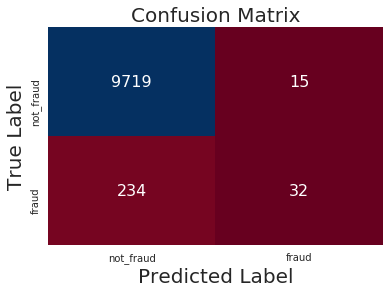

In [208]:
fig = plt.figure()
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testY, predicted_Y.round())
sns.set()
df = pd.DataFrame(cm, index= Target_Label, columns=Target_Label)
sns.heatmap(df, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [209]:
print("Classification Report:\n")
print(classification_report(testY, predicted_Y.round()))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9734
           1       0.68      0.12      0.20       266

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.83      0.56      0.60     10000
weighted avg       0.97      0.98      0.97     10000



Area Under Curve Score = 0.7436108763793601


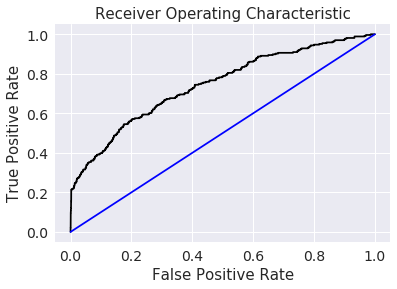

In [210]:
fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testY, predicted_Y)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

## NAIVE BAYES CLASSIFIER

In [213]:
# Concatenate preprocessed data set A and its Target values
df_A = pd.concat([new_datasetA,targetLabelsA], axis = 1)
# Concatenate preprocessed data set B and its Target values
df_B = pd.concat([new_datasetB,targetLabelsB], axis = 1)

In [214]:
# Display two rows of the complete dataset A with its targets value
df_A.head(2)

,amount,hour1,zip1,field1,field2,hour2,flag1,total,field3,field4,...,domain1_6,domain1_7,domain1_8,domain1_9,domain1_10,domain1_11,domain1_12,domain1_13,domain1_14,0
0,12.95,0,925,3,1,0,1,12.95,-4276,7,...,0,0,0,0,0,0,0,0,1,0
1,11.01,0,925,3,1,0,1,11.01,-4276,7,...,0,0,0,0,0,0,0,0,1,0


In [215]:
# Summary of info of the entire set A with its target value
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 40 columns):
amount        94682 non-null float64
hour1         94682 non-null int64
zip1          94682 non-null int64
field1        94682 non-null int64
field2        94682 non-null int64
hour2         94682 non-null int64
flag1         94682 non-null int64
total         94682 non-null float64
field3        94682 non-null int64
field4        94682 non-null int64
field5        94682 non-null int64
indicator1    94682 non-null int64
indicator2    94682 non-null int64
flag2         94682 non-null int64
flag3         94682 non-null int64
flag4         94682 non-null int64
flag5         94682 non-null int64
state1_0      94682 non-null int64
state1_1      94682 non-null int64
state1_2      94682 non-null int64
state1_3      94682 non-null int64
state1_4      94682 non-null int64
state1_5      94682 non-null int64
state1_6      94682 non-null int64
domain1_0     94682 non-null int64
domain1_1   

In [216]:
# Function to differentiate dataset by its class or labe
def splitlabel(DataSet):
    # Create a dictionary to store the separated class or label
    splitedlabel = {}
    for index in range(len(DataSet)):
        data = DataSet[index]
        if (data[-1] not in splitedlabel):
            splitedlabel[data[-1]] = []
        splitedlabel[data[-1]].append(data)
    return splitedlabel
 
# Function to compute the mean of each attribute of every class
def Compute_Mean(data):
    mean = np.mean(data)
    return mean

# Function to compute Standard Deviation of each attribute oof every Class
def Compute_stdDev(data):
    stddev = np.std(data)
    return stddev


# Function to summarize dataset based on mean and std deviation:-
def summarize(DataSet):
    summaries = [(Compute_Mean(variable), Compute_stdDev(variable)) for variable in zip(*DataSet)]
    del summaries[-1]
    return summaries
 
# Function to summarize dataset based on each and every label:-
def summarize_Label(DataSet):
    splitedlabel = splitlabel(DataSet)
    summaries = {}
    for LabelValue, instances in splitedlabel.items():
        summaries[LabelValue] = summarize(instances)
    return summaries
 
# Function to compute the probability:-
def Compute_Probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
 
# Function to compute the  probability of an attribute belonging to a class
def Compute_ClassProbability(summaries, inputData):
    prob = {}
    for LabelValue, LabelSummaries in summaries.items():
        prob[LabelValue] = 1
        for index in range(len(LabelSummaries)):
            mean, stdev = LabelSummaries[index]
            x = inputData[index]
            if (mean != 0):
                prob[LabelValue] *= Compute_Probability(x, mean, stdev)
    return prob

# Funtion to compute the largest probability to determine the best label or class:-
def predict(summaries, inputData):
    prob = Compute_ClassProbability(summaries, inputData)
    bestLabel, bestProb = None, -1
    for LabelValue, probability in prob.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = LabelValue
    return bestLabel
 

# Function to compute prediction for each data instance in test data:-    
def Compute_Predictions(summaries, test_Dataset):
    predictions = []
    for index in range(len(test_Dataset)):
        pred = predict(summaries, test_Dataset[index])
        predictions.append(pred)
    return predictions

# Function to calculate the accuracy of our classifier:-
def Compute_Accuracy(test_Dataset, predictions):
    correct = 0
    for index in range(len(test_Dataset)):
        if test_Dataset[index][-1] == predictions[index]:
            correct += 1
    return (correct/float(len(test_Dataset))) * 100.0
 

In [217]:
# Split dataset A and target labels of dataset A into train (80%) and test (20%)
#trainData, testData = train_test_split(df_A.values, test_size = 0.2, random_state = 50, shuffle = True)

In [313]:
# Using 5 Fold Cross Validation:-

kf = KFold(n_splits=5, random_state=None, shuffle=True)
# returns the number of splitting iterations in the cross-validator
kf.get_n_splits(df_A.values) 
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=True)


In [314]:
for train_index, test_index in kf.split(df_A.values):
    print("Train:", train_index, "Test:",test_index)
    trainData, testData = df_A.values[train_index], df_A.values[test_index]

Train: [    0     1     2 ... 94676 94679 94680] Test: [   14    17    18 ... 94677 94678 94681]
Train: [    0     1     2 ... 94679 94680 94681] Test: [   11    20    22 ... 94650 94658 94675]
Train: [    1     3     4 ... 94678 94679 94681] Test: [    0     2     6 ... 94660 94670 94680]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    5     9    16 ... 94672 94674 94676]
Train: [    0     2     5 ... 94678 94680 94681] Test: [    1     3     4 ... 94669 94673 94679]


In [315]:
print("Training Data set:\n", trainData)
print("\n Testing Data Set :\n", testData)

Training Data set:
 [[ 12.95   0.   925.   ...   0.     1.     0.  ]
 [ 38.85   0.   928.   ...   1.     0.     0.  ]
 [ 38.85   0.   940.   ...   0.     0.     0.  ]
 ...
 [ 12.95  16.   300.   ...   1.     0.     0.  ]
 [ 38.85   6.   105.   ...   0.     1.     1.  ]
 [ 38.85  19.   857.   ...   0.     1.     1.  ]]

 Testing Data Set :
 [[ 11.01   0.   925.   ...   0.     1.     0.  ]
 [ 25.9    0.    77.   ...   0.     1.     0.  ]
 [ 12.95   0.   945.   ...   1.     1.     0.  ]
 ...
 [ 12.95  23.   926.   ...   0.     1.     0.  ]
 [ 39.96  14.   926.   ...   0.     1.     0.  ]
 [ 38.85   5.   906.   ...   0.     1.     1.  ]]


In [316]:
summaries = summarize_Label(trainData)
print("Summaries:\n",summaries)

Summaries:
 {0.0: [(25.690172823503996, 14.166776537030197), (13.986039101317779, 5.171971773272791), (543.3611471160078, 315.3866356343751), (2.404609526895658, 0.9972287312401596), (0.4263879887664722, 0.4945515865935069), (13.996813566645065, 5.167029785359139), (0.5497947720890041, 0.49751430197794727), (25.6818469161806, 14.173852892089863), (740.0639717001512, 3882.5631699107844), (14.026301577014474, 6.523188820821685), (1.3742709008425147, 2.4270553073100576), (0.11274033268524519, 0.3162751176922798), (0.01848401382588032, 0.13469355982661158), (0.5408430546554331, 0.49832905282194145), (0.3967244545258155, 0.4892179082035016), (0.01933462950961331, 0.13769822660927516), (5.14397007993087, 93.45841129339966), (0.0, 0.0), (0.15227370922445452, 0.35928599569629877), (0.1928197234823936, 0.39451270919777337), (0.37363631453877727, 0.48376876604081953), (0.37124648952257505, 0.4831382137026005), (0.5064538777273709, 0.49995834572720166), (0.6468054655433139, 0.4779625040592733), (

In [317]:
# Testing the Bayesian model
predictions = Compute_Predictions(summaries, testData)
print("Predicted Values:\n",predictions)

Predicted Values:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [318]:
accuracy = Compute_Accuracy(testData, predictions)
print('Accuracy: {}'.format(accuracy))

Accuracy: 88.04921841994086


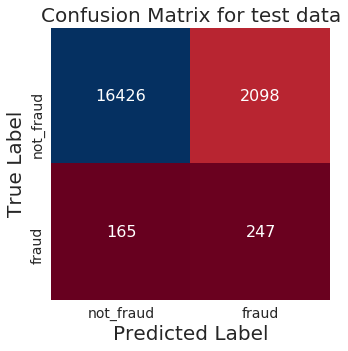

In [319]:
fig = plt.subplots(figsize = (5,5)) 
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testData[:,-1], predictions)
sns.set(font_scale = 1.4)
dframe = pd.DataFrame(cm, index= Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix for test data",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

Area Under Curve Score = 0.7390883058976416


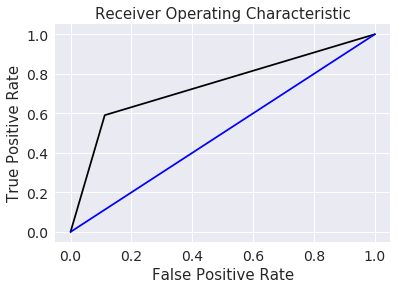

In [306]:
fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testData[:,-1], predictions)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

In [307]:
print("Classification Report:\n")
print(classification_report(testData[:,-1], predictions))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     18533
         1.0       0.10      0.59      0.17       403

   micro avg       0.88      0.88      0.88     18936
   macro avg       0.55      0.74      0.56     18936
weighted avg       0.97      0.88      0.92     18936



In [308]:
# Perforum on repeated K fold:-
# 5 Fold 
rkf = RepeatedKFold(n_splits= 5, n_repeats= 5, random_state = 10)
for train_index, test_index in rkf.split(df_A.values):
    print("Train:", train_index, "Test:",test_index)
    trainData, testData = df_A.values[train_index], df_A.values[test_index]

Train: [    0     1     2 ... 94677 94678 94680] Test: [    5     8    28 ... 94675 94679 94681]
Train: [    1     2     3 ... 94678 94679 94681] Test: [    0     6     7 ... 94672 94677 94680]
Train: [    0     2     5 ... 94679 94680 94681] Test: [    1     3     4 ... 94674 94676 94678]
Train: [    0     1     2 ... 94679 94680 94681] Test: [   12    15    26 ... 94658 94665 94673]
Train: [    0     1     3 ... 94679 94680 94681] Test: [    2    10    19 ... 94653 94656 94670]
Train: [    0     1     2 ... 94677 94679 94681] Test: [    6     8    16 ... 94674 94678 94680]
Train: [    0     1     2 ... 94678 94680 94681] Test: [    3     5     7 ... 94676 94677 94679]
Train: [    3     4     5 ... 94678 94679 94680] Test: [    0     1     2 ... 94672 94673 94681]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    4    14    19 ... 94662 94665 94669]
Train: [    0     1     2 ... 94679 94680 94681] Test: [    9    10    13 ... 94615 94646 94657]
Train: [    0     1     2 ... 

In [309]:
summaries = summarize_Label(trainData)
print("Summaries",summaries)

Summaries {0.0: [(25.675244098314188, 14.155941804971219), (13.980995829340388, 5.180338148634919), (541.6248565913968, 315.56338839014387), (2.4055932729554996, 0.9954337170321031), (0.42538028587239674, 0.494400544360051), (13.990470920109598, 5.1758157020030255), (0.549393297250604, 0.49755432084016066), (25.667149779319463, 14.163849317213092), (752.9462133380124, 3876.417664080043), (14.041436650514921, 6.536546051357068), (1.3642106115617703, 2.416995607199802), (0.11213540471594974, 0.31553297090025306), (0.01812684744024079, 0.1334101377036956), (0.5404311031327188, 0.49836264496797056), (0.3952138644063221, 0.48889657984827756), (0.01889619241722793, 0.13615846036643858), (4.936981198288545, 88.57703796222859), (0.0, 0.0), (0.15287019665537394, 0.3598623342750964), (0.1933620375494338, 0.394934374275227), (0.37288936279339713, 0.48357304092446196), (0.3719445531725357, 0.4833237036788269), (0.5064989404634966, 0.4999577619888024), (0.6456424030557842, 0.4783181895267381), (0.0

In [310]:
# Testing the Bayesian model
predictions = Compute_Predictions(summaries, testData)

In [311]:
# Compute Accuracy:
accuracy = Compute_Accuracy(testData, predictions)
print('Accuracy: {}'.format(accuracy))

Accuracy: 87.79573299535276


Area Under Curve Score = 0.7208127274614262


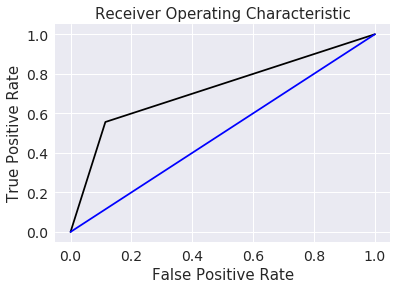

In [312]:
fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testData[:,-1], predictions)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

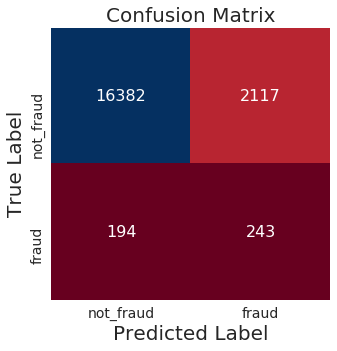

In [298]:
fig = plt.subplots(figsize = (5,5)) 
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testData[:,-1], predictions)
sns.set(font_scale = 1.4)
dframe = pd.DataFrame(cm, index= Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [299]:
print("Classification Report:\n")
print(classification_report(testData[:,-1], predictions))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93     18499
         1.0       0.10      0.56      0.17       437

   micro avg       0.88      0.88      0.88     18936
   macro avg       0.55      0.72      0.55     18936
weighted avg       0.97      0.88      0.92     18936



## Dataset B : Additional Task

In [232]:
# Display two rows of the complete dataset B with its targets value
df_B.head(2)

,amount,hour1,zip1,custAttr1,field1,field2,hour2,flag1,total,field3,...,custAttr2_9,custAttr2_10,custAttr2_11,custAttr2_12,custAttr2_13,custAttr2_14,custAttr2_15,custAttr2_16,custAttr2_17,0
0,12.95,0,986,1234567890123456,0,0,0,0,12.95,-723,...,0,0,0,0,0,0,0,0,1,0
1,38.85,0,980,1234567890123457,3,1,0,0,38.85,5497,...,0,0,0,0,0,0,0,1,0,0


In [233]:
# Summary of info of the entire set B with its target value
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
amount          100000 non-null float64
hour1           100000 non-null int64
zip1            100000 non-null int64
custAttr1       100000 non-null int64
field1          100000 non-null int64
field2          100000 non-null int64
hour2           100000 non-null int64
flag1           100000 non-null int64
total           100000 non-null float64
field3          100000 non-null int64
field4          100000 non-null int64
indicator1      100000 non-null int64
indicator2      100000 non-null int64
flag2           100000 non-null int64
flag3           100000 non-null int64
flag4           100000 non-null int64
flag5           100000 non-null int64
state1_0        100000 non-null int64
state1_1        100000 non-null int64
state1_2        100000 non-null int64
state1_3        100000 non-null int64
state1_4        100000 non-null int64
state1_5        100000 non-null int64
state1_6    

In [320]:
rkf = RepeatedKFold(n_splits= 5, n_repeats= 5, random_state = 10)
for train_index, test_index in rkf.split(df_B.values):
    print("Train:", train_index, "Test:",test_index)
    trainData, testData = df_B.values[train_index], df_B.values[test_index]

Train: [    0     1     2 ... 99997 99998 99999] Test: [    5    28    30 ... 99984 99985 99992]
Train: [    1     2     3 ... 99996 99997 99998] Test: [    0     7     8 ... 99989 99994 99999]
Train: [    0     2     5 ... 99996 99998 99999] Test: [    1     3     4 ... 99993 99995 99997]
Train: [    0     1     2 ... 99996 99997 99999] Test: [   12    15    26 ... 99990 99991 99998]
Train: [    0     1     3 ... 99997 99998 99999] Test: [    2    10    19 ... 99973 99987 99996]
Train: [    0     2     3 ... 99997 99998 99999] Test: [    1     5     6 ... 99979 99983 99990]
Train: [    0     1     2 ... 99996 99997 99998] Test: [    3     7    15 ... 99981 99991 99999]
Train: [    0     1     3 ... 99992 99995 99999] Test: [    2    10    12 ... 99996 99997 99998]
Train: [    1     2     3 ... 99997 99998 99999] Test: [    0    11    14 ... 99988 99989 99992]
Train: [    0     1     2 ... 99997 99998 99999] Test: [    4     9    13 ... 99980 99985 99995]
Train: [    0     1     2 ... 

In [321]:
summaries = summarize_Label(trainData)
print("Summaries",summaries)

Summaries {0.0: [(27.26706356852016, 14.45637651048611), (14.019806558514123, 5.435201085705881), (544.0473071044147, 318.162712261787), (1234567890158208.5, 21424.444058116263), (2.353987643379189, 0.9921108309516582), (0.40710056131427175, 0.4912938980812571), (14.034565141998382, 5.429827392488663), (0.4172864244152441, 0.4931110061781068), (27.26706356852016, 14.45637651048611), (361.3279257061385, 4145.744156701223), (15.064262135049388, 6.456138711072676), (0.1122243201931846, 0.31564223758927157), (0.017160546157501958, 0.12986940291338145), (0.5581930047653911, 0.49660202798254377), (0.3886555431389927, 0.48744477833527694), (0.013975055553414769, 0.11738719425769464), (4.163551822023557, 86.7530855787387), (0.0, 0.0), (0.09665651933772623, 0.29548948645804973), (0.25278409309853184, 0.4346082090514221), (0.4132660269996018, 0.49241975785661374), (0.5091775525670174, 0.4999157654334174), (0.5063517141279077, 0.49995965409984566), (0.6647014244794677, 0.4720947370755516), (0.0, 

In [322]:
# Testing the Naive Bayes model for dataset B
predictions = Compute_Predictions(summaries, testData)

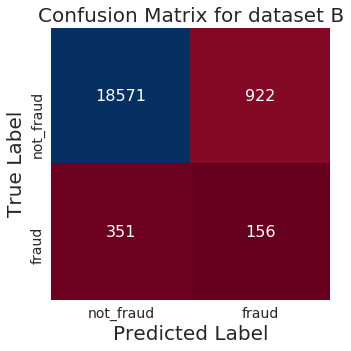

In [323]:
fig = plt.subplots(figsize = (5,5)) 
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testData[:,-1], predictions)
sns.set(font_scale = 1.4)
dframe = pd.DataFrame(cm, index= Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix for dataset B",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [237]:
# Compute Accuracy for dataset B:
accuracy = Compute_Accuracy(testData, predictions)
print('Accuracy for dataset B using Naive Bayes: {} '.format(accuracy))

Accuracy for dataset B using Naive Bayes: 93.635 


Area Under Curve Score = 0.6301966386355654


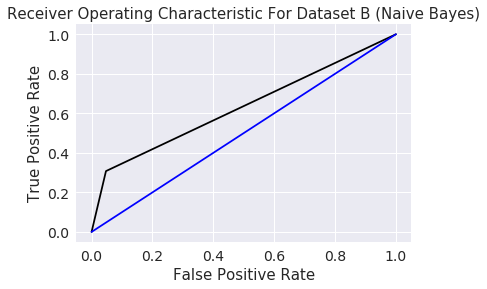

In [238]:
# Plot ROC Curver and Compute the Area under the Curve:

fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testData[:,-1], predictions)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic For Dataset B (Naive Bayes)', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

In [239]:
print("Classification Report for dataset B using Naive Bayes algorithm:\n")
print(classification_report(testData[:,-1], predictions))

Classification Report for dataset B using Naive Bayes algorithm:

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97     19493
         1.0       0.14      0.31      0.20       507

   micro avg       0.94      0.94      0.94     20000
   macro avg       0.56      0.63      0.58     20000
weighted avg       0.96      0.94      0.95     20000



## K NEAREST NEIGHBOUR CLASSIFIER

In [240]:
# Split dataset A and target labels of dataset A into train (80%) and test (20%)
trainX, testX, trainY, testY = train_test_split(new_datasetA,targetLabelsA.values, test_size = 0.2, random_state = 101)

In [241]:
#MinMaxScaler:-
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# Features are transformed by scaling each feature to given range. 
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_TrainX = MinMax_Scaler.fit_transform(trainX)
scaled_TestX = MinMax_Scaler.transform(testX)

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [242]:
# add the target data of train to the end of train data
trainingData = np.column_stack((scaled_TrainX,trainY))

In [243]:
print("Train Data:\n",trainingData)

Train Data:
 [[0.32578616 0.47826087 0.91975928 ... 1.         0.         0.        ]
 [0.13574423 0.86956522 0.08625878 ... 1.         0.         0.        ]
 [0.13574423 0.52173913 0.62988967 ... 1.         1.         0.        ]
 ...
 [0.52358491 0.30434783 0.34102307 ... 0.         1.         0.        ]
 [0.4072327  0.47826087 0.9217653  ... 1.         0.         0.        ]
 [0.13574423 0.04347826 0.97592778 ... 0.         1.         0.        ]]


In [244]:
# add the target data to the end of test data
testingData = np.column_stack((scaled_TestX,testY))

In [245]:
print("Test Data:\n", testingData)

Test Data:
 [[0.13574423 0.39130435 0.5997994  ... 1.         0.         0.        ]
 [0.13574423 0.65217391 0.94182548 ... 0.         1.         0.        ]
 [0.4072327  0.52173913 0.33199599 ... 0.         1.         0.        ]
 ...
 [0.13574423 0.65217391 0.97291876 ... 1.         1.         0.        ]
 [0.4072327  0.34782609 0.94383149 ... 0.         0.         0.        ]
 [0.4072327  0.91304348 0.32898696 ... 0.         0.         0.        ]]


In [246]:
# Function to compute distance using euclidean distance:-
def Compute_Distance(item1, item2, total):
    
    dist = 0
    
    # distance calculation: -
    for i in range(total):
        dist += np.square((item1[i] - item2[i]))
    
    distance = np.sqrt(dist)
    
    return distance


In [247]:
# Function to get the K most nearest neighbors:- 

def compute_Neighbors(trainData, testItem, k):
    
    totallen = len(testItem)-1
    neighbors = []
    listDistance = []

    
    for item in range(len(trainData)):
        
        # Calculate distance
        computedLength = Compute_Distance(testItem, trainData[item], totallen)
        
        # append the distance computed to a list
        listDistance.append((trainData[item], computedLength))
    
    # Sort the distances    
    listDistance.sort(key=operator.itemgetter(1))
    
    # Compute neighbors based on the value of k
    for i in range(k):
        
        # append the neighbors into a list
        neighbors.append(listDistance[i][0])
    
    return neighbors


In [248]:
def compute_Prediction(neighbors):
    
    labelScore = {}
    
    for item in range(len(neighbors)):
        
        # last element is the predicted label
        prediction = neighbors[item][-1]
        
        # Compute the score for the label
        if prediction in labelScore:
            
            labelScore[prediction] += 1
        else:
            
            labelScore[prediction] = 1
            
    # Sort the predicted label in descending order:-
    labelScore = sorted(labelScore.items(), key=operator.itemgetter(1), reverse=True)
    
    # Maximum score is for  the first element
    predictedLabel = labelScore[0][0]
    
    return predictedLabel
 

In [249]:
# Function to compute accuracy:

def compute_Accuracy(testData, predictions):
    # initialize the number of correct prediction to zero
    correctPredictions = 0
    # Loop through test data:-
    for item in range(len(testData)):
        
        if testData[item][-1] == predictions[item]:
            # Increment correct predictions
            correctPredictions += 1
    # calculate accuracy
    accuracy = (correctPredictions / float(len(testData))) * 100.0
    
    return accuracy

In [250]:
# Compute predictions:-

# Create a list to store the predicted value:-
predictions_ss1 = []

# Taking only subset of dataset

trainingData_subset1 = trainingData[0:5000,0:]
testingData_subset1 = testingData[0:5000,0:]

# Provide the value of K (Give an Odd Number)
k = 7

for item in range(len(testingData_subset1)):
    
    # get the neighbors:-
    neighbors = compute_Neighbors(trainingData_subset1, testingData_subset1[item], k)
    
    # Get Prediction:-
    predicted = compute_Prediction(neighbors)
    
    # Append the predicted value to a list:-
    predictions_ss1.append(predicted)

    # Print the predicted value and actual value:-
    print('Predicted label =' + repr(predicted) + ', Actual label =' + repr(testingData_subset1[item][-1]))


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


In [268]:
# Get the accuracy for our prediction:-
accuracy_ss1 = Compute_Accuracy(testingData_subset1, predictions_ss1)

# Print the accuracy:-
print('\n !! Final Accuracy is for second subset of entire dataset !!\n', accuracy_ss1)


 !! Final Accuracy is for second subset of entire dataset !!
 98.06


In [252]:
print("Classification Report for subset 1 using KNN:\n")
print(classification_report(testingData_subset1[:,-1], predictions_ss1))

Classification Report for subset 1 using KNN:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4905
         1.0       0.42      0.05      0.09        95

   micro avg       0.98      0.98      0.98      5000
   macro avg       0.70      0.53      0.54      5000
weighted avg       0.97      0.98      0.97      5000



Area Under Curve Score = 0.5256022318793927


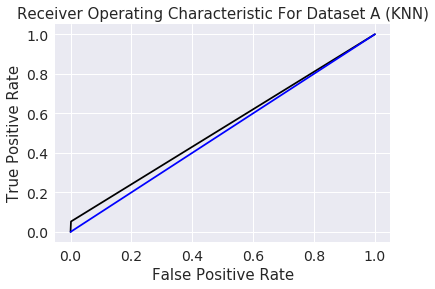

In [253]:
# Plot ROC Curver and Compute the Area under the Curve:

fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testingData_subset1[:,-1], predictions_ss1)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic For Dataset A (KNN)', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

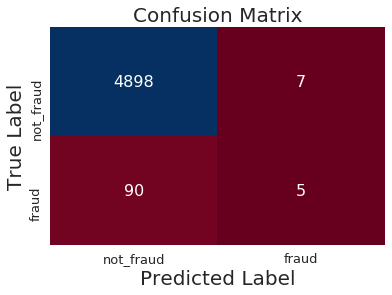

In [254]:
fig = plt.figure()
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testingData_subset1[:,-1], predictions_ss1)
sns.set(font_scale = 1.3)
dframe = pd.DataFrame(cm, index=Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [255]:
# Compute predictions:-

# Create a list to store the predicted value:-
predictions_ss2 = []

# Taking only subset of dataset

trainingData_subset2 = trainingData[5001:10000,0:]
testingData_subset2 = testingData[5001:10000,0:]

# Provide the value of K (Give an Odd Number)
k = 7

for item in range(len(testingData_subset2)):
    
    # get the neighbors:-
    neighbors = compute_Neighbors(trainingData_subset2, testingData_subset2[item], k)
    
    # Get Prediction:-
    predicted = compute_Prediction(neighbors)
    
    # Append the predicted value to a list:-
    predictions_ss2.append(predicted)

    # Print the predicted value and actual value:-
    print('Predicted label =' + repr(predicted) + ', Actual label =' + repr(testingData_subset2[item][-1]))


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


In [256]:
# Get the accuracy for our prediction:-
accuracy_ss2 = Compute_Accuracy(testingData_subset2, predictions_ss2)

# Print the accuracy:-
print('\n !! Final Accuracy is for second subset of entire dataset !!\n', accuracy_ss2)


 !! Final Accuracy is for second subset of entire dataset !!
 98.05961192238448


Area Under Curve Score = 0.5


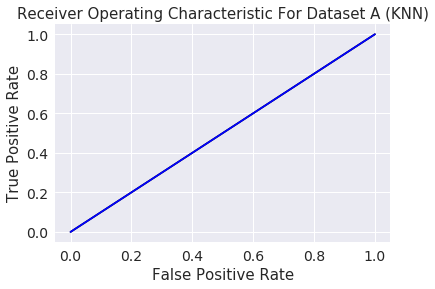

In [257]:
# Plot ROC Curver and Compute the Area under the Curve:

fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testingData_subset2[:,-1], predictions_ss2)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic For Dataset A (KNN)', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

In [258]:
print("Classification Report for subset 2 using KNN:\n")
print(classification_report(testingData_subset2[:,-1], predictions_ss2))

Classification Report for subset 2 using KNN:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4902
         1.0       0.00      0.00      0.00        97

   micro avg       0.98      0.98      0.98      4999
   macro avg       0.49      0.50      0.50      4999
weighted avg       0.96      0.98      0.97      4999



/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


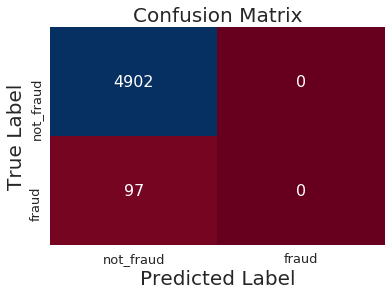

In [259]:
fig = plt.figure()
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testingData_subset2[:,-1], predictions_ss2)
sns.set(font_scale = 1.3)
dframe = pd.DataFrame(cm, index=Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [261]:
# Compute predictions:-

# Create a list to store the predicted value:-
predictions_ss3 = []

# Taking only subset of dataset

trainingData_subset3 = trainingData[10001:15000,0:]
testingData_subset3 = testingData[10001:15000,0:]

# Provide the value of K (Give an Odd Number)
k = 7

for item in range(len(testingData_subset3)):
    
    # get the neighbors:-
    neighbors = compute_Neighbors(trainingData_subset3, testingData_subset3[item], k)
    
    # Get Prediction:-
    predicted = compute_Prediction(neighbors)
    
    # Append the predicted value to a list:-
    predictions_ss3.append(predicted)

    # Print the predicted value and actual value:-
    print('Predicted label =' + repr(predicted) + ', Actual label =' + repr(testingData_subset3[item][-1]))


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


In [262]:
# Get the accuracy for our prediction:-
accuracy_ss3 = Compute_Accuracy(testingData_subset3, predictions_ss3)

# Print the accuracy:-
print('\n !! Final Accuracy is for third subset of entire dataset !!\n', accuracy_ss3)


 !! Final Accuracy is for third subset of entire dataset !!
 98.21964392878576


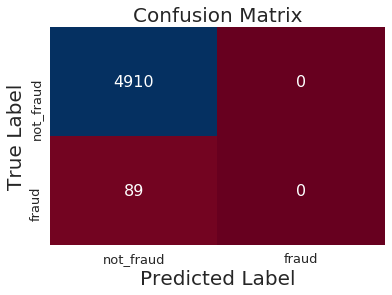

In [263]:
fig = plt.figure()
Target_Label = ['not_fraud', 'fraud']
cm = confusion_matrix(testingData_subset3[:,-1], predictions_ss3)
sns.set(font_scale = 1.3)
dframe = pd.DataFrame(cm, index=Target_Label, columns=Target_Label)
sns.heatmap(dframe, annot=True,cbar = None, cmap="RdBu", fmt = 'g', annot_kws = {"size":16})
plt.title("Confusion Matrix",fontsize = 20)
plt.ylabel("True Label", fontsize = 20)
plt.xlabel("Predicted Label",fontsize = 20)
plt.show()

In [264]:
print("Classification Report for subset 3 using KNN:\n")
print(classification_report(testingData_subset3[:,-1], predictions_ss3))

Classification Report for subset 3 using KNN:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4910
         1.0       0.00      0.00      0.00        89

   micro avg       0.98      0.98      0.98      4999
   macro avg       0.49      0.50      0.50      4999
weighted avg       0.96      0.98      0.97      4999



/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Area Under Curve Score = 0.5


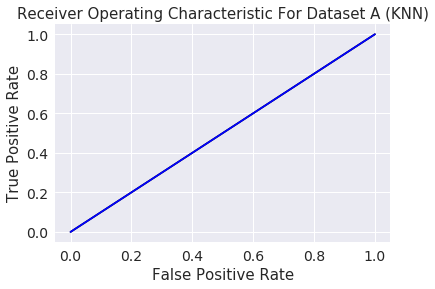

In [265]:
# Plot ROC Curver and Compute the Area under the Curve:

fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testingData_subset3[:,-1], predictions_ss3)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic For Dataset A (KNN)', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

In [269]:
overallAccuracy = (accuracy_ss1+accuracy_ss2+accuracy_ss3)/3
print("\n !!!! Over All accuracy for K = 7 using KNN Classifier is :\n", overallAccuracy)


 !!!! Over All accuracy for K = 7 using KNN Classifier is :
 98.11308528372342


### DATASET B :

In [270]:
# Split dataset A and target labels of dataset A into train (80%) and test (20%)
trainX, testX, trainY, testY = train_test_split(new_datasetB,targetLabelsB.values, test_size = 0.2, random_state = 101)

In [271]:
#MinMaxScaler:-
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
# Features are transformed by scaling each feature to given range. 
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_TrainX = MinMax_Scaler.fit_transform(trainX)
scaled_TestX = MinMax_Scaler.transform(testX)

/home/paperspace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [272]:
# add the target data of train to the end of train data
trainingData = np.column_stack((scaled_TrainX,trainY))

In [273]:
# add the target data to the end of test data
testingData = np.column_stack((scaled_TestX,testY))



In [274]:
# Compute predictions:-

# Create a list to store the predicted value:-
predictions_ss1 = []

# Taking only subset of dataset

trainingData_subset1 = trainingData[0:5000,0:]
testingData_subset1 = testingData[0:5000,0:]

# Provide the value of K (Give an Odd Number)
k = 7

for item in range(len(testingData_subset1)):
    
    # get the neighbors:-
    neighbors = compute_Neighbors(trainingData_subset1, testingData_subset1[item], k)
    
    # Get Prediction:-
    predicted = compute_Prediction(neighbors)
    
    # Append the predicted value to a list:-
    predictions_ss1.append(predicted)

    # Print the predicted value and actual value:-
    print('Predicted label =' + repr(predicted) + ', Actual label =' + repr(testingData_subset1[item][-1]))


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =1.0, Actual label =1.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0
Predicted label =0.0, Actual label =0.0


In [275]:
# Get the accuracy for our prediction:-
accuracy_ss1 = Compute_Accuracy(testingData_subset1, predictions_ss1)

# Print the accuracy:-
print('\n !! Final Accuracy is for  subset of entire dataset B !!\n', accuracy_ss1)


 !! Final Accuracy is for second subset of entire dataset !!
 97.32


In [276]:
print("Classification Report for subset of B using KNN:\n")
print(classification_report(testingData_subset1[:,-1], predictions_ss1))

Classification Report for subset 1 using KNN:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4845
         1.0       0.68      0.25      0.37       155

   micro avg       0.97      0.97      0.97      5000
   macro avg       0.83      0.62      0.68      5000
weighted avg       0.97      0.97      0.97      5000



Area Under Curve Score = 0.6239488664735843


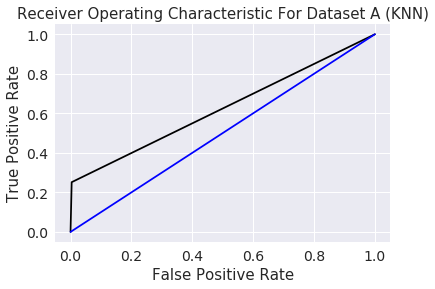

In [277]:
# Plot ROC Curver and Compute the Area under the Curve:

fig = plt.figure()
fpr, tpr, threshold = metrics.roc_curve(testingData_subset1[:,-1], predictions_ss1)
roc_auc = metrics.auc(fpr, tpr)
sns.set(font_scale = 1.4)
print("Area Under Curve Score =",roc_auc)
plt.title('Receiver Operating Characteristic For Dataset B (KNN)', fontsize = 15)
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1],'b-')
plt.grid(True)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()